In [1]:
# Import needed packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, make_scorer


import statistics as stat

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
# class distribution
# transported: False = 0, True = 1
train_data['Transported'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

the train data is almost balanced

# Pre-Processing

In [5]:
# by default majority class (not transported (False)) will be negative
lb = LabelBinarizer()
train_data['Transported'] = lb.fit_transform(train_data['Transported'].values)


The .isnull() method in Python searches for both None and NaN values

In [6]:
print('\nNull Values in Training \n{}'.format(train_data.isnull().sum()))
print('\nNull Values in Testing \n{}'.format(test_data.isnull().sum()))
print('\nDuplicated values in train {}'.format(train_data.duplicated().sum()))
print('\nDuplicated values in test {}'.format(test_data.duplicated().sum()))



Null Values in Training 
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Null Values in Testing 
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

Duplicated values in train 0

Duplicated values in test 0


we have null values everywhere:

In [7]:
#Removing less important features
train_data.drop(['PassengerId','Name','Cabin','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'], axis=1, inplace = True)
test_data.drop(['PassengerId','Name','Cabin','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'], axis=1, inplace = True)


# Treatment of missing data and duplicates

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   8492 non-null   object 
 1   CryoSleep    8476 non-null   object 
 2   Destination  8511 non-null   object 
 3   Age          8514 non-null   float64
 4   VIP          8490 non-null   object 
 5   Transported  8693 non-null   int32  
dtypes: float64(1), int32(1), object(4)
memory usage: 373.7+ KB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   4190 non-null   object 
 1   CryoSleep    4184 non-null   object 
 2   Destination  4185 non-null   object 
 3   Age          4186 non-null   float64
 4   VIP          4184 non-null   object 
dtypes: float64(1), object(4)
memory usage: 167.2+ KB


In [10]:
for i in train_data.columns:
    p = train_data[i].isnull().sum()/(train_data[i].count()+train_data[i].isnull().sum())
    print(f'Percentage of null values Train Data column {i} :',f"{p:.2%}")

Percentage of null values Train Data column HomePlanet : 2.31%
Percentage of null values Train Data column CryoSleep : 2.50%
Percentage of null values Train Data column Destination : 2.09%
Percentage of null values Train Data column Age : 2.06%
Percentage of null values Train Data column VIP : 2.34%
Percentage of null values Train Data column Transported : 0.00%


In [11]:
for i in test_data.columns:
    p = test_data[i].isnull().sum()/(test_data[i].count()+test_data[i].isnull().sum())
    print(f'Percentage of null values Test Data column {i} :',f"{p:.2%}")

Percentage of null values Test Data column HomePlanet : 2.03%
Percentage of null values Test Data column CryoSleep : 2.17%
Percentage of null values Test Data column Destination : 2.15%
Percentage of null values Test Data column Age : 2.13%
Percentage of null values Test Data column VIP : 2.17%


we can deduce that the percentages of missing values are very low and this does not represent an obstacle to training the model, however we will adopt two different techniques to fill in the missing values.

First we will create another category for the Cabin column to be able to process it later,
according to the project description the last letter of the cabin refers to two specific places

train_data["Cabin"] = train_data["Cabin"].fillna('X')
train_data['Cabin'] = train_data['Cabin'].astype(pd.StringDtype())
train_data["Cabin_Category"] = ["Port" if s.rfind('P') > -1 else "Starboard" if s.rfind('S') > -1 else np.nan for s in train_data["Cabin"]]
print(train_data['Cabin_Category'].value_counts(dropna=False))

test_data["Cabin"] = test_data["Cabin"].fillna('X')
test_data['Cabin'] = test_data['Cabin'].astype(pd.StringDtype())
test_data["Cabin_Category"] = ["Port" if s.rfind('P') > -1 else "Starboard" if s.rfind('S') > -1 else np.nan for s in test_data["Cabin"]]
print(test_data['Cabin_Category'].value_counts(dropna=False))

we can now drop the column "Cabin"

train_data.drop(['Cabin'], axis=1, inplace=True)
test_data.drop(['Cabin'], axis=1, inplace=True)

Let's take a look at the distribution of data in the columns to determine which strategy for filling missing data to adopt

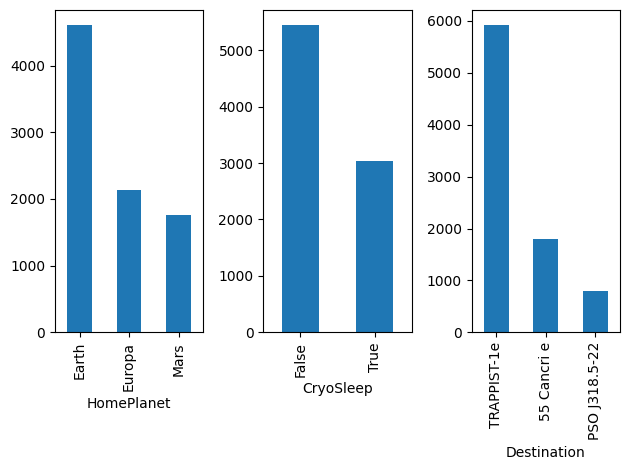

In [12]:

fig, axes = plt.subplots(1,3)
train_data['HomePlanet'].value_counts().plot.bar(ax=axes[0])
train_data['CryoSleep'].value_counts().plot.bar(ax=axes[1])
#train_data['Cabin_Category'].value_counts().plot.bar(ax=axes[1,0])
train_data['Destination'].value_counts().plot.bar(ax=axes[2])

fig.tight_layout()
plt.show()

<Axes: xlabel='VIP'>

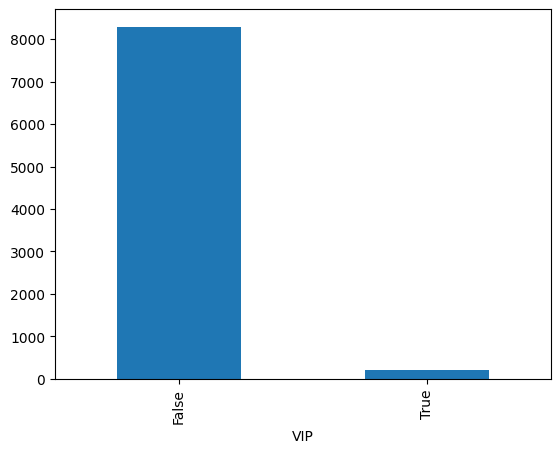

In [13]:
train_data['VIP'].value_counts().plot.bar()

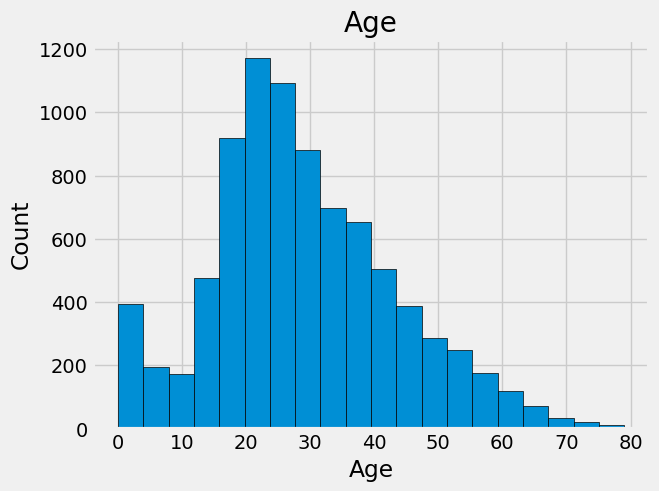

In [14]:
plt.style.use('fivethirtyeight')

#AgeDistribution
plt.hist(train_data['Age'], edgecolor = 'k', bins = 20)
plt.title('Age'); plt.xlabel('Age'); plt.ylabel('Count');



For the VIP column there is a large disparity in the distribution of values since the vast majority of passengers are not classified as VIP so we will adopt the method of filling missing data for this column mode() for the age given a column containing continuous type data we will adopt the mean() method while we notice for the other columns there is a certain fairness in the distribution of the data (to a degree less for the destination column) therefore we will adopt the filling by applying the MissForest model for these columns

Filling Age by the mean method


In [15]:
#Filling Age by mean
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].mean())
test_data["Age"] = test_data["Age"].fillna(test_data["Age"].mean())

Filling VIP by mode() method

In [16]:
# Calculate the mode value of the 'VIP' column
mode_vip= train_data['VIP'].mode().iloc[0]
mode_vip_test= test_data['VIP'].mode().iloc[0]
# Fill missing values in the 'VIP' column with the mode
train_data['VIP'].fillna(mode_vip, inplace=True)
test_data['VIP'].fillna(mode_vip_test, inplace=True)

Transforming Age to int and VIP to int

In [17]:
train_data['Age'] = train_data['Age'].astype(int)
test_data['Age'] = test_data['Age'].astype(int)

In [18]:
train_data['VIP'] = train_data['VIP'].replace({True: 1, False: 0})
test_data['VIP'] = test_data['VIP'].replace({True: 1, False: 0})

Filling the remaining columns by adopting MissForest Algorithm

In [19]:
from missforest.missforest import MissForest
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


mf = MissForest()
train_data_imputed = mf.fit_transform(train_data,categorical=['HomePlanet','CryoSleep','Destination'])
test_data_imputed = mf.fit_transform(test_data,categorical=['HomePlanet','CryoSleep','Destination'])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 88
[LightGBM] [Info] Number of data points in the train set: 8103, number of used features: 5
[LightGBM] [Info] Start training from score -1.380265
[LightGBM] [Info] Start training from score -0.612905
[LightGBM] [Info] Start training from score -1.576421
[LightGBM] [Info] Number of positive: 2914, number of negative: 5189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 8103, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359620 -> initscore=-

In [20]:
train_data_imputed.isnull().sum()

HomePlanet     0
CryoSleep      0
Destination    0
Age            0
VIP            0
Transported    0
dtype: int64

In [21]:
test_data_imputed.isnull().sum()

HomePlanet     0
CryoSleep      0
Destination    0
Age            0
VIP            0
dtype: int64

In [22]:
train_data_imputed.reindex(columns = ['HomePlanet', 'CryoSleep', 'Destination','Age','Transported'])

,HomePlanet,CryoSleep,Destination,Age,Transported
0,Europa,False,TRAPPIST-1e,39,0
1,Earth,False,TRAPPIST-1e,24,1
2,Europa,False,TRAPPIST-1e,58,0
3,Europa,False,TRAPPIST-1e,33,0
4,Earth,False,TRAPPIST-1e,16,1
...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41,0
8689,Earth,True,PSO J318.5-22,18,0
8690,Earth,False,TRAPPIST-1e,26,1
8691,Europa,False,55 Cancri e,32,0


In [23]:
targets = train_data_imputed['Transported']
train_data_imputed = train_data_imputed.drop('Transported', axis=1)  # Dropping targets to normalize
train_data_imputed = pd.get_dummies(train_data_imputed)
test_data_imputed = pd.get_dummies(test_data_imputed)                                             # Handling Categorical Values  

age_class_series = pd.cut(train_data['Age'], bins=[0, 12, 19, 55, 100],
       labels=['children', 'young', 'adult', '55+'])
train_data['Age-class'] = age_class_series


age_class_series_test_data = pd.cut(test_data['Age'], bins=[0, 12, 19, 55, 100],
       labels=['children', 'young', 'adult', '55+'])
test_data['Age-class'] = age_class_series_test_data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(train_data_imputed, targets,random_state=42,test_size=0.2,stratify=targets)

train_test_split with stratify=True results in consistent class distribution betwen training and test sets.

In [25]:
print('y_train class distribution')
print(y_train.value_counts(normalize=True))

print('y_test class distribution')
print(y_test.value_counts(normalize=True))

y_train class distribution
Transported
1    0.503595
0    0.496405
Name: proportion, dtype: float64
y_test class distribution
Transported
1    0.503738
0    0.496262
Name: proportion, dtype: float64


Random Forest - Score:  0.7176538240368028


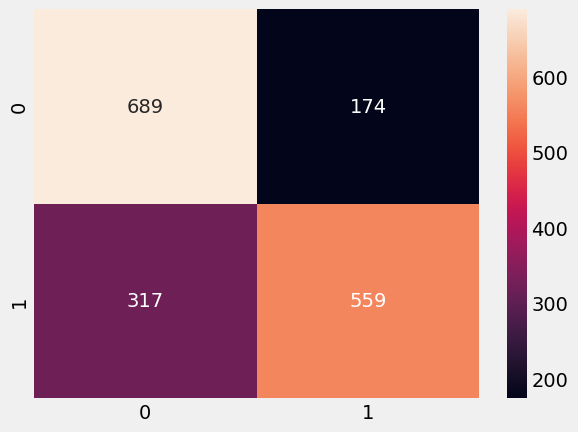

In [26]:
clf = RandomForestClassifier(n_jobs=-1,random_state=42)
clf.fit(X_train, y_train)
pred_1 = clf.predict(X_test)
score_1 = accuracy_score(y_test, pred_1)
print("Random Forest - Score: ", score_1)
cm = confusion_matrix(y_test, pred_1)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [27]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [28]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomForestClassifier(n_jobs=-1,random_state=42)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 60, stop = 180, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 200, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [6, 7, 8,9,10,11,12,13,14,15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [8,9,10,11,12,13,14,15]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [8, 9, 10, 11, 12, 13, 14, 15],
 'min_samples_split': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 'n_estimators': [60, 73, 86, 100, 113, 126, 140, 153, 166, 180]}


In [29]:
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
clf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [20, 40, 60, 80, 100, 120,
                                                      140, 160, 180, 200,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [8, 9, 10, 11, 12,
                                                             13, 14, 15],
                                        'min_samples_split': [6, 7, 8, 9, 10,
                                                              11, 12, 13, 14,
                                                              15],
                                        'n_estimators': [60, 73, 86, 100, 113,
                                                         126, 140, 153, 166,
                                                         180]},
                   random_state=42, verbose=2)

In [30]:
clf_random.best_params_

{'n_estimators': 166,
 'min_samples_split': 12,
 'min_samples_leaf': 15,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [31]:
clf_random.best_estimator_

RandomForestClassifier(min_samples_leaf=15, min_samples_split=12,
                       n_estimators=166, n_jobs=-1, random_state=42)

Random Forest - Score:  0.7326049453709028


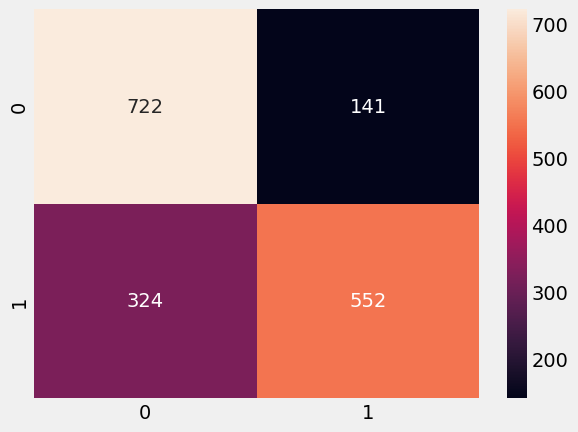

In [32]:

pred_1_random = clf_random.predict(X_test)
score_1_random = accuracy_score(y_test, pred_1_random)
print("Random Forest - Score: ", score_1_random)
cm = confusion_matrix(y_test, pred_1_random)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [20,30,40,50],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [15,16,17],
    'min_samples_split': [12,13,14],
    'n_estimators': [160,170, 180, 190]
}
# Create a based model
clf = RandomForestClassifier(n_jobs=-1,random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)

In [35]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 16,
 'min_samples_split': 12,
 'n_estimators': 160}

In [36]:
best_grid = grid_search.best_estimator_

Random Forest - Score:  0.7331799884991375


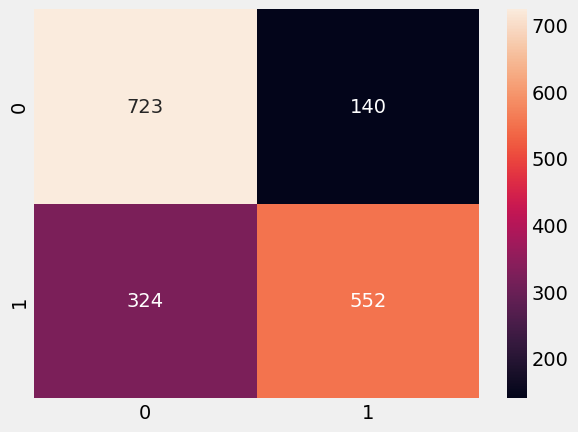

In [37]:
pred_1_grid = best_grid.predict(X_test)
score_1_grid = accuracy_score(y_test, pred_1_grid)
print("Random Forest - Score: ", score_1_grid)
cm = confusion_matrix(y_test, pred_1_grid)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [38]:
predictions = best_grid.predict(test_data_imputed)

In [39]:
predictions = predictions.astype(dtype=bool)

In [40]:
output = pd.DataFrame({'PassengerId': pd.read_csv("test.csv").PassengerId, 'Transported': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
